In [16]:
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import scikit_posthocs as sp
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.transforms import BlendedGenericTransform
import scikit_posthocs as sp
sns.set()

In [2]:
df = pd.read_pickle("sisec18.pd")

metrics = ['SDR', 'SIR', 'SAR', 'ISR']
targets = ['vocals', 'accompaniment', 'drums', 'bass', 'other']

# Boxplots

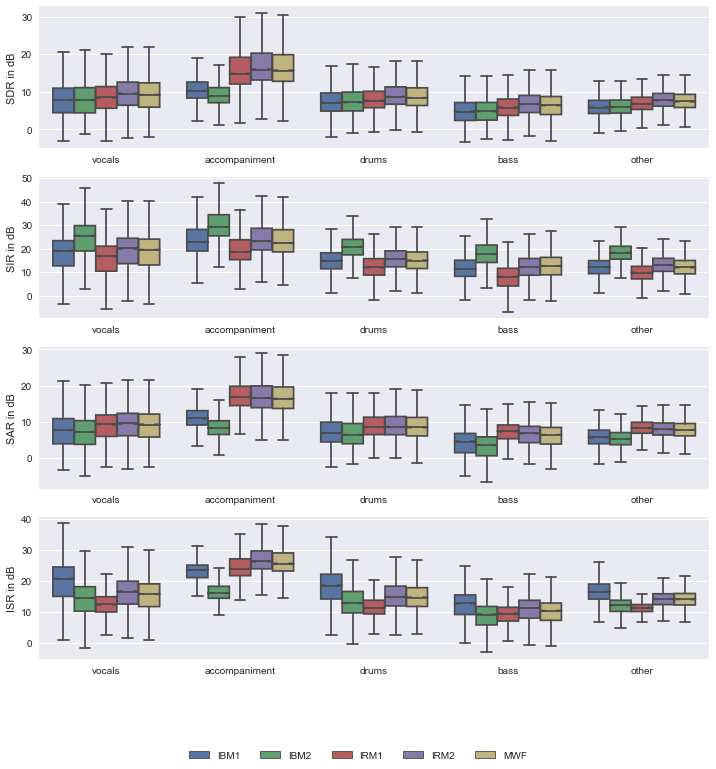

In [3]:
f = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(4, 1)

axes = []
for i, metric in enumerate(metrics):
    ax = plt.subplot(gs[i, 0])
    axes.append(ax)
    df_m = df[df.metric == metric]

    ax = sns.boxplot(
        'name',
        "score",
        "estimate",
        data=df_m,
        showmeans=False,
        notch=True,
        showfliers=False,
        order=targets,
        ax=ax,
    )
    ax.set_ylabel(metric + ' in dB')
    ax.legend_.remove()
    ax.set_xlabel('')

h, leg = ax.get_legend_handles_labels()

plt.figlegend(
    h, leg,
    loc='lower center', ncol=len(targets), labelspacing=0.,
)


# Heatmap for all tracks (SDR)

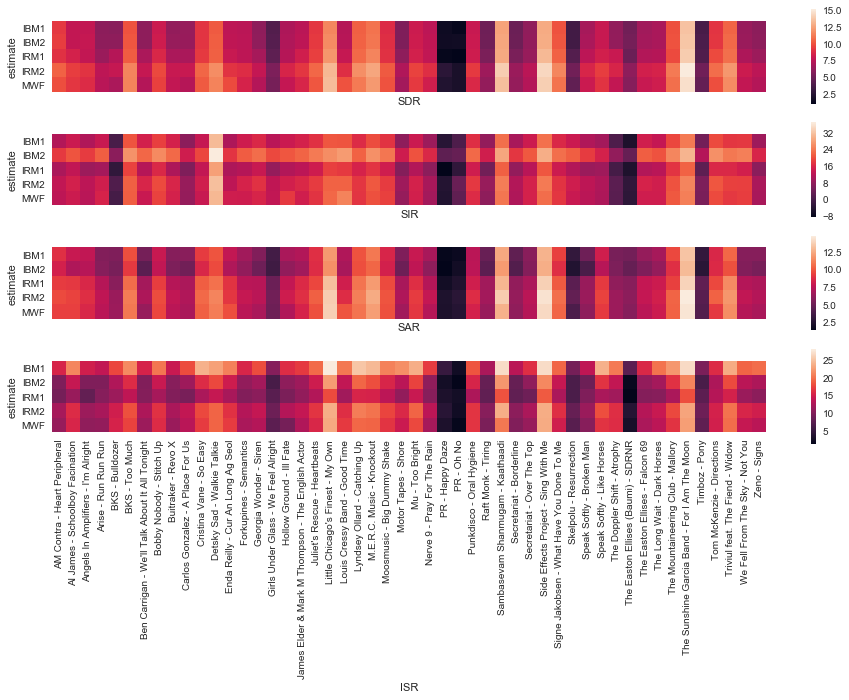

In [4]:
f = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(4, 1)

axes = []
for i, metric in enumerate(metrics):
    df_voc = df[(df.name == 'vocals') & (df.metric == metric)]
    pivoted = pd.pivot_table(df_voc, values='score', index='estimate', columns='track')
    ax = plt.subplot(gs[i, 0])
    axes.append(ax)
    sns.heatmap(pivoted, square=True, ax=ax)
    ax.set_xlabel(metric)


_ = plt.setp(axes[0].get_xticklabels(), visible=False)
_ = plt.setp(axes[1].get_xticklabels(), visible=False)
_ = plt.setp(axes[2].get_xticklabels(), visible=False)


# Statistical Significance tests

In [19]:
df_voc = df[(df.name == 'vocals') & (df.metric == "SDR")]
chi2_test, p_test = scipy.stats.friedmanchisquare(
   *[
      df_voc[df_voc["estimate"] == i]["score"]
      for i in np.unique(df_voc["estimate"].values)
   ]
)

print("chi^2 DFR vocals: ", chi2_test)
print("p-value vocals: ", p_test)

chi^2 DFR vocals:  36680.29799947724
p-value vocals:  0.0


In [21]:
df_voc = df_voc.dropna()
sp.posthoc_conover(df_voc, val_col='score', group_col='estimate')

,IBM1,IBM2,IRM1,IRM2,MWF
IBM1,-1.000000e+00,1.654583e-01,2.985219e-15,4.240749e-125,3.381274e-80
IBM2,1.654583e-01,-1.000000e+00,7.818113e-11,3.114835e-111,3.448178e-69
IRM1,2.985219e-15,7.818113e-11,-1.000000e+00,2.872982e-57,1.233427e-28
IRM2,4.240749e-125,3.114835e-111,2.872982e-57,-1.000000e+00,1.165841e-06
MWF,3.381274e-80,3.448178e-69,1.233427e-28,1.165841e-06,-1.000000e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x1168131d0>,
 <matplotlib.colorbar.ColorbarBase at 0x115d74080>)

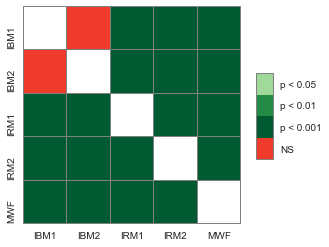

In [14]:
pc = sp.posthoc_conover(df_voc, val_col='score', group_col='estimate')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)